# Análise Exploratória de Dados - Sistema de Recomendação

In [4]:
import sys
sys.path.append('..')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
%matplotlib inline

# Configurações visuais
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10


## SEÇÃO 1: CARREGAMENTO E VISÃO GERAL

In [7]:
print("=" * 80)
print("📂 CARREGANDO DADOS")
print("=" * 80)

# Carregue seus dados
df = pd.read_csv('../data/processed/ratings.csv')

print(f"\n✅ Dataset carregado com sucesso!")
print(f"   Dimensões: {df.shape[0]:,} linhas x {df.shape[1]} colunas")
print(f"\n📋 Primeiras 5 linhas:")
display(df.head())

print(f"\n🔍 Informações do dataset:")
display(df.info())

print(f"\n📊 Estatísticas descritivas:")
display(df.describe())

📂 CARREGANDO DADOS

✅ Dataset carregado com sucesso!
   Dimensões: 100,000 linhas x 4 colunas

📋 Primeiras 5 linhas:


,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596



🔍 Informações do dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user_id    100000 non-null  int64
 1   item_id    100000 non-null  int64
 2   rating     100000 non-null  int64
 3   timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB


None


📊 Estatísticas descritivas:


,user_id,item_id,rating,timestamp
count,100000.00000,100000.000000,100000.000000,1.000000e+05
mean,462.48475,425.530130,3.529860,8.835289e+08
std,266.61442,330.798356,1.125674,5.343856e+06
min,1.00000,1.000000,1.000000,8.747247e+08
25%,254.00000,175.000000,3.000000,8.794487e+08
50%,447.00000,322.000000,4.000000,8.828269e+08
75%,682.00000,631.000000,4.000000,8.882600e+08
max,943.00000,1682.000000,5.000000,8.932866e+08


## SEÇÃO 2: QUALIDADE DOS DADOS

In [8]:
print("\n" + "=" * 80)
print("🔎 ANÁLISE DE QUALIDADE DOS DADOS")
print("=" * 80)

# Valores ausentes
missing = df.isnull().sum()
print(f"\n❓ Valores ausentes:")
print(missing[missing > 0] if missing.sum() > 0 else "✅ Nenhum valor ausente!")

# Duplicatas
duplicates = df.duplicated().sum()
print(f"\n🔄 Duplicatas: {duplicates}")
if duplicates > 0:
    print(f"   ⚠️ Removendo {duplicates} linhas duplicadas...")
    df = df.drop_duplicates()

# Range de valores
print(f"\n📏 Range dos dados:")
print(f"   user_id: {df['user_id'].min()} a {df['user_id'].max()}")
print(f"   item_id: {df['item_id'].min()} a {df['item_id'].max()}")
print(f"   rating: {df['rating'].min()} a {df['rating'].max()}")



🔎 ANÁLISE DE QUALIDADE DOS DADOS

❓ Valores ausentes:
✅ Nenhum valor ausente!

🔄 Duplicatas: 0

📏 Range dos dados:
   user_id: 1 a 943
   item_id: 1 a 1682
   rating: 1 a 5


## SEÇÃO 3: ANÁLISE DE RATINGS



⭐ ANÁLISE DAS AVALIAÇÕES

📊 Distribuição de ratings:
rating
1     6110
2    11370
3    27145
4    34174
5    21201
Name: count, dtype: int64

📈 Estatísticas de ratings:
   Média: 3.53
   Mediana: 4.00
   Moda: 4
   Desvio padrão: 1.13

💾 Gráfico salvo: ../docs/01_rating_distribution.png


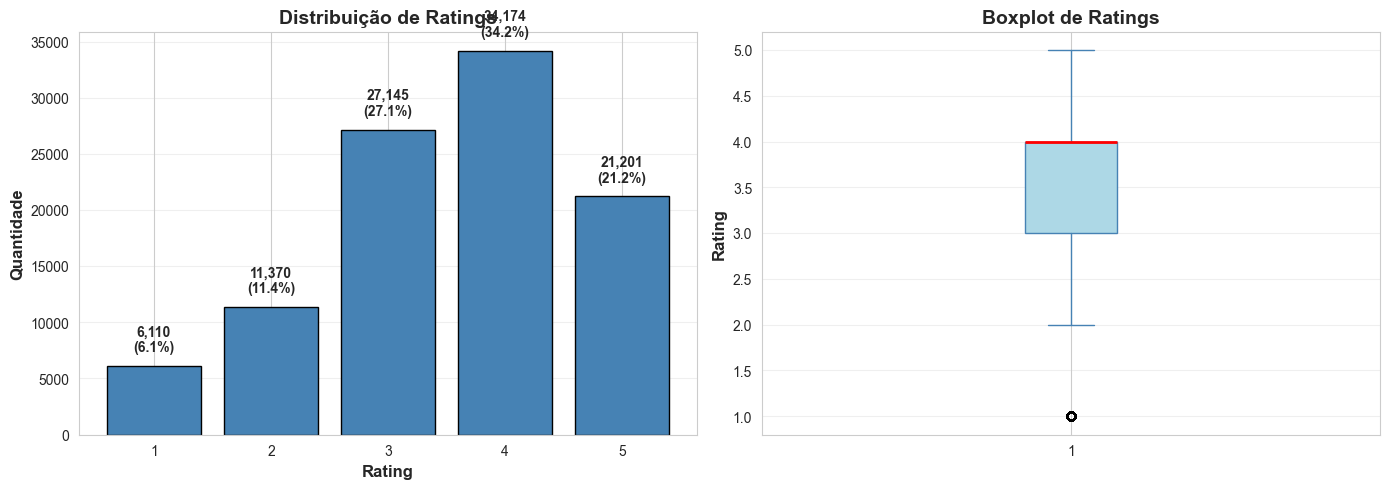

In [10]:
print("\n" + "=" * 80)
print("⭐ ANÁLISE DAS AVALIAÇÕES")
print("=" * 80)

rating_counts = df['rating'].value_counts().sort_index()
print(f"\n📊 Distribuição de ratings:")
print(rating_counts)

print(f"\n📈 Estatísticas de ratings:")
print(f"   Média: {df['rating'].mean():.2f}")
print(f"   Mediana: {df['rating'].median():.2f}")
print(f"   Moda: {df['rating'].mode()[0]}")
print(f"   Desvio padrão: {df['rating'].std():.2f}")

# Visualização 1: Distribuição de ratings
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Gráfico de barras
axes[0].bar(rating_counts.index, rating_counts.values, color='steelblue', edgecolor='black')
axes[0].set_xlabel('Rating', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Quantidade', fontsize=12, fontweight='bold')
axes[0].set_title('Distribuição de Ratings', fontsize=14, fontweight='bold')
axes[0].grid(axis='y', alpha=0.3)

# Adicionar porcentagens nas barras
total = rating_counts.sum()
for i, v in enumerate(rating_counts.values):
    axes[0].text(rating_counts.index[i], v + total*0.01, 
                f'{v:,}\n({v/total*100:.1f}%)', 
                ha='center', va='bottom', fontweight='bold')

# Boxplot
axes[1].boxplot(df['rating'], vert=True, patch_artist=True,
                boxprops=dict(facecolor='lightblue', color='steelblue'),
                medianprops=dict(color='red', linewidth=2),
                whiskerprops=dict(color='steelblue'),
                capprops=dict(color='steelblue'))
axes[1].set_ylabel('Rating', fontsize=12, fontweight='bold')
axes[1].set_title('Boxplot de Ratings', fontsize=14, fontweight='bold')
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('../docs/01_rating_distribution.png', dpi=300, bbox_inches='tight')
print("\n💾 Gráfico salvo: ../docs/01_rating_distribution.png")
plt.show()

## SEÇÃO 4: ANÁLISE DE USUÁRIOS


👥 ANÁLISE DE USUÁRIOS

📊 Estatísticas de usuários:
   Total de usuários: 943
   Avaliações por usuário (média): 106.0
   Avaliações por usuário (mediana): 65.0
   Usuário mais ativo: 737 avaliações
   Usuário menos ativo: 20 avaliação(ões)

🏆 Top 10 usuários mais ativos:
 user_id  num_ratings  avg_rating
     405          737    1.834464
     655          685    2.908029
      13          636    3.097484
     450          540    3.864815
     276          518    3.465251
     416          493    3.845842
     537          490    2.865306
     303          484    3.365702
     234          480    3.122917
     393          448    3.337054

💾 Gráfico salvo: ../docs/02_user_activity.png


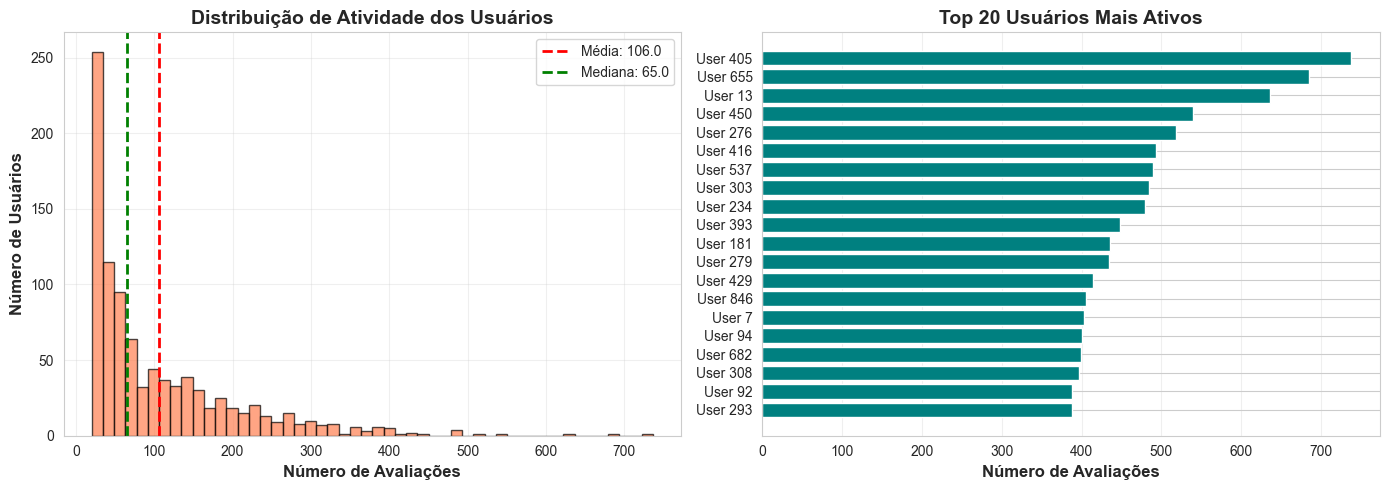

In [12]:
print("\n" + "=" * 80)
print("👥 ANÁLISE DE USUÁRIOS")
print("=" * 80)

user_stats = df.groupby('user_id').agg({
    'rating': ['count', 'mean', 'std']
}).reset_index()
user_stats.columns = ['user_id', 'num_ratings', 'avg_rating', 'std_rating']

print(f"\n📊 Estatísticas de usuários:")
print(f"   Total de usuários: {df['user_id'].nunique():,}")
print(f"   Avaliações por usuário (média): {user_stats['num_ratings'].mean():.1f}")
print(f"   Avaliações por usuário (mediana): {user_stats['num_ratings'].median():.1f}")
print(f"   Usuário mais ativo: {user_stats['num_ratings'].max()} avaliações")
print(f"   Usuário menos ativo: {user_stats['num_ratings'].min()} avaliação(ões)")

# Top 10 usuários mais ativos
top_users = user_stats.nlargest(10, 'num_ratings')
print(f"\n🏆 Top 10 usuários mais ativos:")
print(top_users[['user_id', 'num_ratings', 'avg_rating']].to_string(index=False))

# Visualização 2: Distribuição de atividade dos usuários
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histograma de avaliações por usuário
axes[0].hist(user_stats['num_ratings'], bins=50, color='coral', edgecolor='black', alpha=0.7)
axes[0].axvline(user_stats['num_ratings'].mean(), color='red', linestyle='--', linewidth=2, label=f'Média: {user_stats["num_ratings"].mean():.1f}')
axes[0].axvline(user_stats['num_ratings'].median(), color='green', linestyle='--', linewidth=2, label=f'Mediana: {user_stats["num_ratings"].median():.1f}')
axes[0].set_xlabel('Número de Avaliações', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Número de Usuários', fontsize=12, fontweight='bold')
axes[0].set_title('Distribuição de Atividade dos Usuários', fontsize=14, fontweight='bold')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Top 20 usuários
top_20 = user_stats.nlargest(20, 'num_ratings')
axes[1].barh(range(len(top_20)), top_20['num_ratings'].values, color='teal')
axes[1].set_yticks(range(len(top_20)))
axes[1].set_yticklabels([f"User {uid}" for uid in top_20['user_id'].values])
axes[1].set_xlabel('Número de Avaliações', fontsize=12, fontweight='bold')
axes[1].set_title('Top 20 Usuários Mais Ativos', fontsize=14, fontweight='bold')
axes[1].grid(axis='x', alpha=0.3)
axes[1].invert_yaxis()

plt.tight_layout()
plt.savefig('../docs/02_user_activity.png', dpi=300, bbox_inches='tight')
print("\n💾 Gráfico salvo: ../docs/02_user_activity.png")
plt.show()

## SEÇÃO 5: ANÁLISE DE ITENS


🎬 ANÁLISE DE ITENS

📊 Estatísticas de itens:
   Total de itens: 1,682
   Avaliações por item (média): 59.5
   Avaliações por item (mediana): 27.0
   Item mais avaliado: 583 avaliações
   Item menos avaliado: 1 avaliação(ões)

❄️ Itens com cold start (<5 avaliações): 333 (19.8%)

⭐ Top 10 itens mais bem avaliados (min 20 avaliações):
 item_id  num_ratings  avg_rating
     408          112    4.491071
     318          298    4.466443
     169          118    4.466102
     483          243    4.456790
     114           67    4.447761
      64          283    4.445230
     603          209    4.387560
      12          267    4.385768
      50          583    4.358491
     178          125    4.344000

💾 Gráfico salvo: docs/03_item_analysis.png


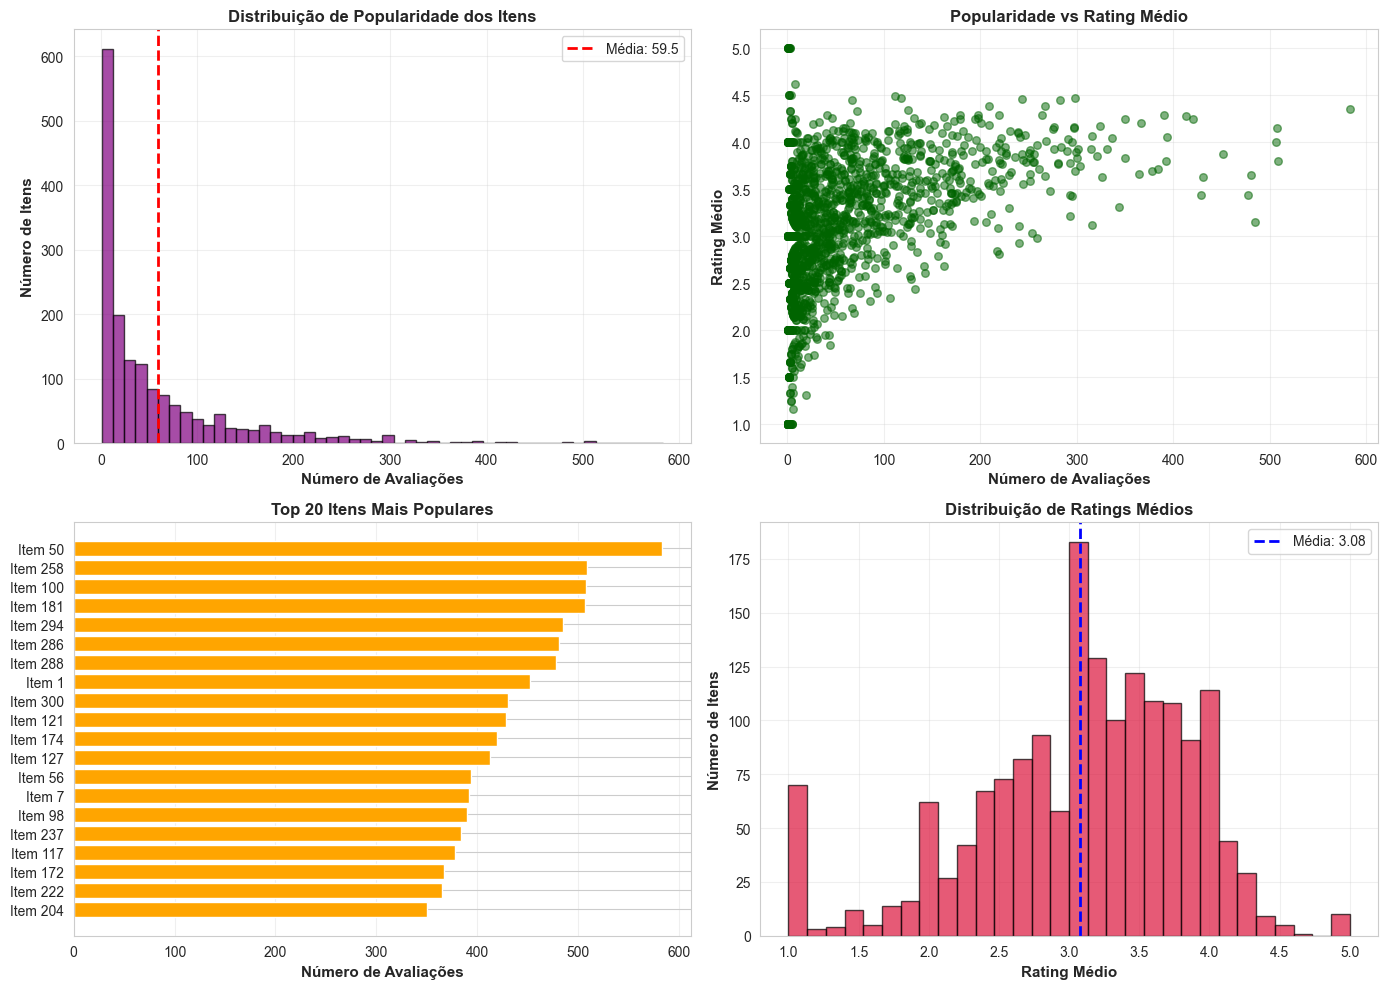

In [14]:
print("\n" + "=" * 80)
print("🎬 ANÁLISE DE ITENS")
print("=" * 80)

item_stats = df.groupby('item_id').agg({
    'rating': ['count', 'mean', 'std']
}).reset_index()
item_stats.columns = ['item_id', 'num_ratings', 'avg_rating', 'std_rating']

print(f"\n📊 Estatísticas de itens:")
print(f"   Total de itens: {df['item_id'].nunique():,}")
print(f"   Avaliações por item (média): {item_stats['num_ratings'].mean():.1f}")
print(f"   Avaliações por item (mediana): {item_stats['num_ratings'].median():.1f}")
print(f"   Item mais avaliado: {item_stats['num_ratings'].max()} avaliações")
print(f"   Item menos avaliado: {item_stats['num_ratings'].min()} avaliação(ões)")

# Itens com poucas avaliações (problema de cold start)
cold_start_threshold = 5
cold_items = item_stats[item_stats['num_ratings'] < cold_start_threshold]
print(f"\n❄️ Itens com cold start (<{cold_start_threshold} avaliações): {len(cold_items)} ({len(cold_items)/len(item_stats)*100:.1f}%)")

# Top itens mais bem avaliados (com mínimo de 20 avaliações)
popular_items = item_stats[item_stats['num_ratings'] >= 20].nlargest(10, 'avg_rating')
print(f"\n⭐ Top 10 itens mais bem avaliados (min 20 avaliações):")
print(popular_items[['item_id', 'num_ratings', 'avg_rating']].to_string(index=False))

# Visualização 3: Análise de itens
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Distribuição de popularidade
axes[0, 0].hist(item_stats['num_ratings'], bins=50, color='purple', edgecolor='black', alpha=0.7)
axes[0, 0].axvline(item_stats['num_ratings'].mean(), color='red', linestyle='--', linewidth=2, label=f'Média: {item_stats["num_ratings"].mean():.1f}')
axes[0, 0].set_xlabel('Número de Avaliações', fontsize=11, fontweight='bold')
axes[0, 0].set_ylabel('Número de Itens', fontsize=11, fontweight='bold')
axes[0, 0].set_title('Distribuição de Popularidade dos Itens', fontsize=12, fontweight='bold')
axes[0, 0].legend()
axes[0, 0].grid(alpha=0.3)

# Relação entre popularidade e rating médio
axes[0, 1].scatter(item_stats['num_ratings'], item_stats['avg_rating'], alpha=0.5, color='darkgreen', s=30)
axes[0, 1].set_xlabel('Número de Avaliações', fontsize=11, fontweight='bold')
axes[0, 1].set_ylabel('Rating Médio', fontsize=11, fontweight='bold')
axes[0, 1].set_title('Popularidade vs Rating Médio', fontsize=12, fontweight='bold')
axes[0, 1].grid(alpha=0.3)

# Top 20 itens mais populares
top_20_items = item_stats.nlargest(20, 'num_ratings')
axes[1, 0].barh(range(len(top_20_items)), top_20_items['num_ratings'].values, color='orange')
axes[1, 0].set_yticks(range(len(top_20_items)))
axes[1, 0].set_yticklabels([f"Item {iid}" for iid in top_20_items['item_id'].values])
axes[1, 0].set_xlabel('Número de Avaliações', fontsize=11, fontweight='bold')
axes[1, 0].set_title('Top 20 Itens Mais Populares', fontsize=12, fontweight='bold')
axes[1, 0].grid(axis='x', alpha=0.3)
axes[1, 0].invert_yaxis()

# Distribuição de ratings médios
axes[1, 1].hist(item_stats['avg_rating'], bins=30, color='crimson', edgecolor='black', alpha=0.7)
axes[1, 1].axvline(item_stats['avg_rating'].mean(), color='blue', linestyle='--', linewidth=2, label=f'Média: {item_stats["avg_rating"].mean():.2f}')
axes[1, 1].set_xlabel('Rating Médio', fontsize=11, fontweight='bold')
axes[1, 1].set_ylabel('Número de Itens', fontsize=11, fontweight='bold')
axes[1, 1].set_title('Distribuição de Ratings Médios', fontsize=12, fontweight='bold')
axes[1, 1].legend()
axes[1, 1].grid(alpha=0.3)

plt.tight_layout()
plt.savefig('../docs/03_item_analysis.png', dpi=300, bbox_inches='tight')
print("\n💾 Gráfico salvo: docs/03_item_analysis.png")
plt.show()

## SEÇÃO 6: MATRIZ DE ESPARSIDADE

In [15]:
print("\n" + "=" * 80)
print("🕸️ ANÁLISE DE ESPARSIDADE")
print("=" * 80)

num_users = df['user_id'].nunique()
num_items = df['item_id'].nunique()
num_ratings = len(df)
possible_ratings = num_users * num_items
sparsity = 1 - (num_ratings / possible_ratings)

print(f"\n📊 Métricas da matriz:")
print(f"   Usuários: {num_users:,}")
print(f"   Itens: {num_items:,}")
print(f"   Avaliações: {num_ratings:,}")
print(f"   Avaliações possíveis: {possible_ratings:,}")
print(f"   Esparsidade: {sparsity*100:.2f}%")
print(f"   Densidade: {(1-sparsity)*100:.2f}%")

if sparsity > 0.99:
    print(f"\n⚠️ ATENÇÃO: Matriz muito esparsa! Considere:")
    print(f"   - Filtrar usuários/itens com poucas avaliações")
    print(f"   - Usar técnicas de matrix factorization")
    print(f"   - Implementar cold start handling")


🕸️ ANÁLISE DE ESPARSIDADE

📊 Métricas da matriz:
   Usuários: 943
   Itens: 1,682
   Avaliações: 100,000
   Avaliações possíveis: 1,586,126
   Esparsidade: 93.70%
   Densidade: 6.30%


## SEÇÃO 7: INSIGHTS E RECOMENDAÇÕES

In [16]:
print("\n" + "=" * 80)
print("💡 INSIGHTS E PRÓXIMOS PASSOS")
print("=" * 80)

print("\n📌 Principais descobertas:")
print(f"   1. Rating médio geral: {df['rating'].mean():.2f}")
print(f"   2. {len(cold_items)} itens com cold start problem")
print(f"   3. Distribuição de ratings: {'equilibrada' if rating_counts.std() < 5000 else 'desbalanceada'}")
print(f"   4. Esparsidade da matriz: {sparsity*100:.1f}%")

print("\n🎯 Recomendações para modelagem:")
print("   ✓ Usar collaborative filtering para usuários/itens populares")
print("   ✓ Implementar content-based para cold start")
print("   ✓ Considerar ensemble de métodos")
if user_stats['num_ratings'].std() > 50:
    print("   ✓ Ponderar por número de avaliações (usuários ativos têm mais peso)")

print("\n" + "=" * 80)
print("✅ ANÁLISE EXPLORATÓRIA CONCLUÍDA!")
print("=" * 80)
print("\nPróximo passo: Executar 02_model_development.py")


💡 INSIGHTS E PRÓXIMOS PASSOS

📌 Principais descobertas:
   1. Rating médio geral: 3.53
   2. 333 itens com cold start problem
   3. Distribuição de ratings: desbalanceada
   4. Esparsidade da matriz: 93.7%

🎯 Recomendações para modelagem:
   ✓ Usar collaborative filtering para usuários/itens populares
   ✓ Implementar content-based para cold start
   ✓ Considerar ensemble de métodos
   ✓ Ponderar por número de avaliações (usuários ativos têm mais peso)

✅ ANÁLISE EXPLORATÓRIA CONCLUÍDA!

Próximo passo: Executar 02_model_development.py
